In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### LOAD DATASET

In [2]:
#Loading the first sales dataset
raw_sale_data = pd.read_excel('QVI_transaction_data.xlsx')
raw_sale_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
df_sale = raw_sale_data.copy()

In [4]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


HENCE NO NULL VALUES IN ALL THE COLUMNS

In [5]:
df_sale.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


#### Converting date into yyyy/mm/dd format

In [6]:
df_sale['DATE'][0]

np.int64(43390)

In [7]:
df_sale['DATE'] = pd.to_datetime(df_sale['DATE'], origin = '01/01/1900', unit = 'D')

In [8]:
df_sale.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
#store number column
df_sale['STORE_NBR'].unique()
#no missing value and store number is less than 300

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

In [10]:
df_sale['LYLTY_CARD_NBR'].unique()
#same number of values as much as in the customer behaviour columns

array([  1000,   1307,   1343, ..., 272358, 272379, 272380],
      shape=(72637,))

In [11]:
df_sale['PROD_NBR'].unique()

array([  5,  66,  61,  69, 108,  57,  16,  24,  42,  52, 114,  15,  92,
        44,  54,  94,  98,  93,  56,   7,  31,  32, 111,  46,  13,  99,
        26,  64,  22,  48,  37,  36,  51, 107, 106,   4, 113,  45,  39,
       102, 104,   3,  82,  88,  40,  73,  87,  84,  70,  89, 101,  63,
        25,  47,  71,  65,  33,  35,  12,   8,  75, 100,  29,  59,  30,
        81,  67, 110,  28,   2,  14,  77,  17,  83,  68,  96,  79,  23,
        50,  78,   1,  86,  53,  72,  74,  76,   9,  91, 105,  90, 109,
        27,  62, 112,  55,  18,  34,  49,  60,  38, 103,  85,  95,  97,
        20,  19,  21,   6,  80,  58,  10,  11,  43,  41])

In [12]:
df_sale['TOT_SALES'].unique()

array([  6.  ,   6.3 ,   2.9 ,  15.  ,  13.8 ,   5.1 ,   5.7 ,   3.6 ,
         3.9 ,   7.2 ,  23.  ,   9.2 ,   1.7 ,   3.3 ,   2.1 ,   3.  ,
         3.8 ,   5.4 ,   2.7 ,   3.7 ,  14.8 ,   4.4 ,   6.6 ,   2.6 ,
         3.25,   4.6 ,   5.8 ,  15.5 ,   7.8 ,   4.2 ,   7.4 ,   7.6 ,
         8.4 ,   6.5 ,   4.3 ,  28.5 ,   7.5 ,   3.4 ,  19.  ,  11.8 ,
        17.6 ,   9.  ,  13.2 ,   1.9 ,  10.2 ,  13.  ,  15.2 ,  11.4 ,
        14.5 ,   5.6 ,  10.8 ,  10.4 ,   1.5 ,  16.5 ,   1.8 ,   5.2 ,
         5.9 ,  18.4 ,   8.8 ,  18.5 ,   6.2 ,   4.8 ,   8.6 ,   2.8 ,
         2.3 ,   3.1 ,   2.4 ,  15.6 ,  19.5 ,  27.  ,   9.9 ,  16.2 ,
        13.5 ,  21.6 ,  23.6 ,  29.5 ,  12.6 ,   8.1 ,  15.3 ,  11.1 ,
        22.  ,   9.5 ,  16.25,  20.4 ,  11.7 ,  22.8 ,   9.6 ,   8.5 ,
        10.5 ,  21.  ,  12.  ,  14.4 ,   9.75,  16.8 ,  25.5 ,  17.7 ,
        17.2 ,  17.1 ,   4.5 ,   6.8 ,  18.  ,  12.9 ,  11.5 ,   8.7 ,
        14.  ,  11.6 ,  12.4 , 650.  ,  21.5 ,   9.3 ,  11.2 ,   6.9 ])

In [13]:
df_sale['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [14]:
#extracting pack size and brand name from product name to analyse their impacts on sale
df_sale['PACK_SIZE(g)'] = df_sale['PROD_NAME'].str.extract(r'(\d+)')

In [15]:
df_sale['PROD_NAME'].str.split()

0                    [Natural, Chip, Compny, SeaSalt175g]
1                              [CCs, Nacho, Cheese, 175g]
2            [Smiths, Crinkle, Cut, Chips, Chicken, 170g]
3             [Smiths, Chip, Thinly, S/Cream&Onion, 175g]
4          [Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]
                               ...                       
264831    [Kettle, Sweet, Chilli, And, Sour, Cream, 175g]
264832                 [Tostitos, Splash, Of, Lime, 175g]
264833                          [Doritos, Mexicana, 170g]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno, 150g]
264835                 [Tostitos, Splash, Of, Lime, 175g]
Name: PROD_NAME, Length: 264836, dtype: object

In [16]:
df_sale['BRAND_NAME'] = [i[0] for i in df_sale['PROD_NAME'].str.split()]

In [17]:
df_sale.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [18]:
df_sale[df_sale['PROD_QTY']== 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito


In [19]:
df_sale['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [20]:
#considering the prod_qty = 200 as outlier and has not much significance in the data so dropping it.
df_sale = df_sale[df_sale['PROD_QTY'] != 200]

In [21]:
df_sale['TOT_SALES'].describe()

count    264834.000000
mean          7.299346
std           2.527241
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max          29.500000
Name: TOT_SALES, dtype: float64

In [22]:
#loading second data
raw_customer_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
raw_customer_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [23]:
df_cust_behav = raw_customer_behaviour.copy()

In [24]:
df_cust_behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**NO NULL VALUES IN THIS TABLE. LETS LOOK FOR OUTLIERS OR OTHER WRONG VALUES IN THE COLUMNS**

In [25]:
df_cust_behav['LYLTY_CARD_NBR'].unique()

array([   1000,    1002,    1003, ..., 2370751, 2370961, 2373711],
      shape=(72637,))

In [26]:
df_cust_behav['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [27]:
df_cust_behav['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [28]:
#combining both datasets into one on the basis of loyalty card number column
df_merged = pd.merge(df_sale,df_cust_behav, how = 'left', on = 'LYLTY_CARD_NBR')

In [29]:
df_merged.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-21,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-18,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-18,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-22,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
9,2018-08-20,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain,MIDAGE SINGLES/COUPLES,Budget


In [30]:
#saving the cleaned and preprocessed file ready for analysis into a csv file
df_merged.to_csv('Sales Data Merged and Preprocessed.csv', index = False)

In [31]:
#readimmg the saved merged csv file
df_complete = pd.read_csv("Sales Data Merged and Preprocessed.csv")
df_complete.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


#### Q. WHAT IS THE BEST SELLING PRODUCT BRAND?

In [32]:
sale_by_brand = df_complete.groupby('BRAND_NAME')['TOT_SALES'].sum(numeric_only=True)

In [33]:
sale_by_brand.index

Index(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito', 'Doritos',
       'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns', 'Kettle', 'NCC',
       'Natural', 'Old', 'Pringles', 'RRD', 'Red', 'Smith', 'Smiths', 'Snbts',
       'Sunbites', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'WW',
       'Woolworths'],
      dtype='object', name='BRAND_NAME')

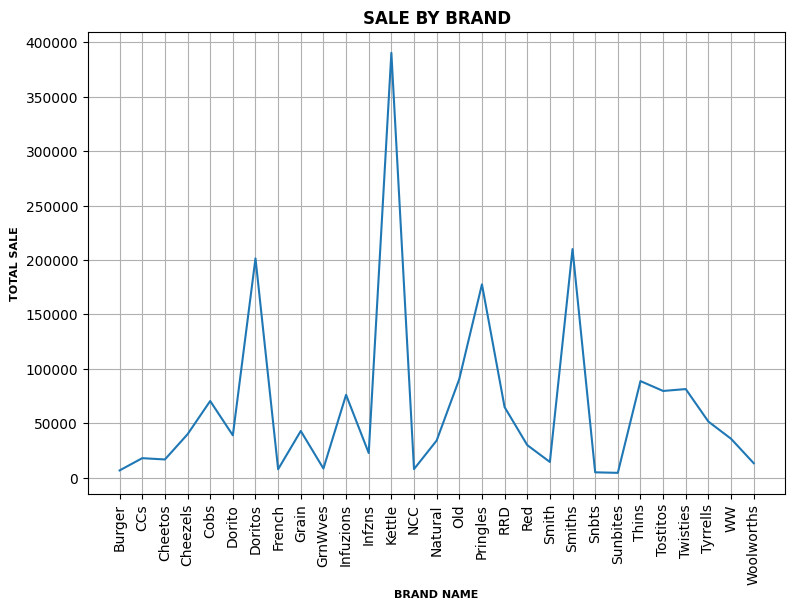

In [34]:
plt.figure(figsize = (9, 6))

plt.plot(sale_by_brand.index, sale_by_brand.values)
plt.xticks(sale_by_brand.index, rotation = 'vertical')
plt.xlabel("BRAND NAME", fontsize = 8, fontweight = 'bold')
plt.ylabel("TOTAL SALE", fontsize = 8, fontweight = 'bold')
plt.title("SALE BY BRAND", fontsize = 12, fontweight = 'bold')
plt.grid(True)
plt.show()

In [35]:
df_complete[df_complete['BRAND_NAME']== 'Kettle']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
11,2018-08-22,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
23,2018-08-21,36,36302,33188,32,Kettle Sea Salt And Vinegar 175g,1,5.4,175,Kettle,MIDAGE SINGLES/COUPLES,Budget
24,2018-08-17,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
27,2019-05-17,41,41423,38393,46,Kettle Original 175g,1,5.4,175,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264817,2019-06-17,272,272053,269703,46,Kettle Original 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264819,2019-05-31,272,272105,269792,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264821,2019-03-19,272,272156,269855,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135,Kettle,YOUNG SINGLES/COUPLES,Premium
264822,2019-03-15,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150,Kettle,YOUNG SINGLES/COUPLES,Premium


#### Q. WHAT IS THE IMPACT OF PACK SIZE ON BRAND SALE?

In [36]:
s= df_complete.groupby(["PACK_SIZE(g)","BRAND_NAME"])['TOT_SALES'].sum()

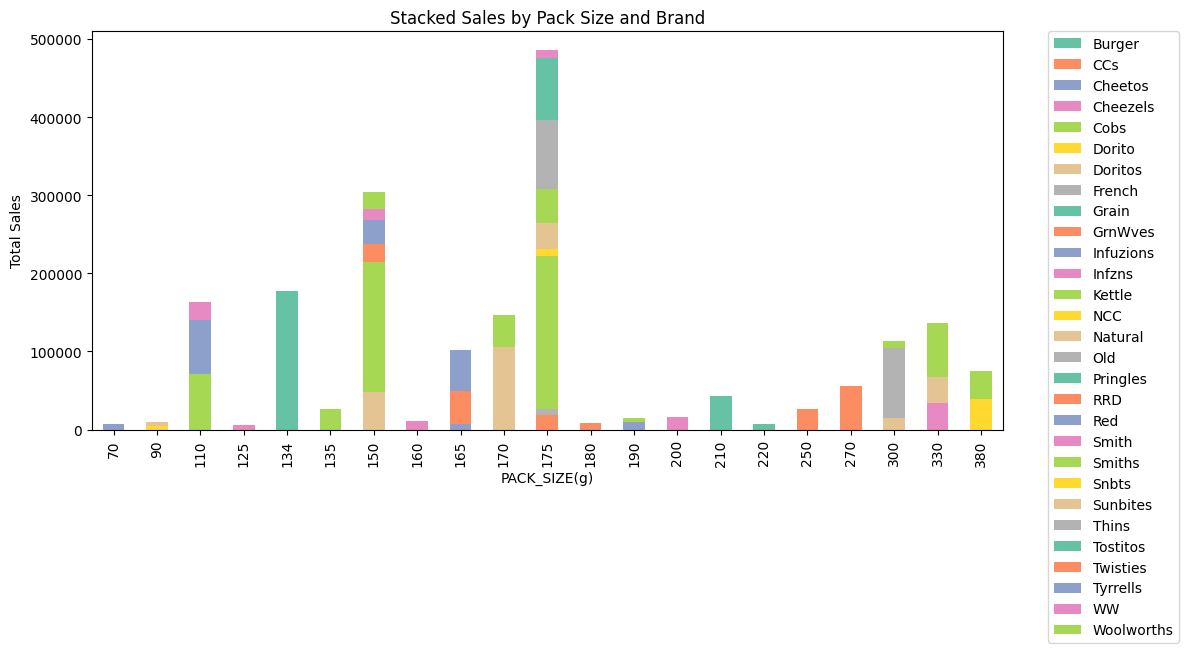

In [37]:
s_unstacked = s.unstack()   # columns = BRAND_NAME, index = PACK_SIZE(g)

colors = sns.color_palette("Set2", n_colors=s_unstacked.shape[1])
s_unstacked.plot(kind="bar", stacked=True, figsize=(12,6), color = colors)
plt.title("Stacked Sales by Pack Size and Brand")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [38]:
df_complete.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


#### Q. RECOGNISING TOP BEST AND WORST PERFORMING STORES FOR THE YEAR.

In [39]:
top_20_store = df_complete.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending = False)[:20]

In [40]:
least_sale_stores =  df_complete.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values()[:20]
least_sale_stores

STORE_NBR
211      5.20
76       6.00
11       6.70
252      7.40
206      7.60
92       9.20
193     13.10
85      13.90
31      14.80
117    161.80
177    211.20
99     221.90
140    244.90
198    252.70
42     257.80
146    275.10
267    275.40
263    300.50
244    331.75
161    335.20
Name: TOT_SALES, dtype: float64

In [41]:
 df_complete.groupby('STORE_NBR')['TOT_SALES'].mean().sort_values(ascending = False)

STORE_NBR
92     9.200000
96     8.862020
174    8.837452
246    8.834125
26     8.822744
         ...   
266    3.653459
117    3.517391
99     3.467188
11     3.350000
211    2.600000
Name: TOT_SALES, Length: 272, dtype: float64

In [42]:
top_20_store

STORE_NBR
226    17605.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
81     14361.95
201    14298.70
130    14289.65
72     14204.40
181    14108.45
217    13993.60
95     13915.50
261    13859.75
238    13708.40
210    13689.25
Name: TOT_SALES, dtype: float64

THE AVERAGE SALE IS NOT VERY DIFFERENT FOR THE STORES. HENCE SIMILAR ORDER VALUE IN EACH ORDER BUT FREQUENCY OF ORDER IS WAY MORE IN SOME STORES SHOWN BY TOTAL SALES.

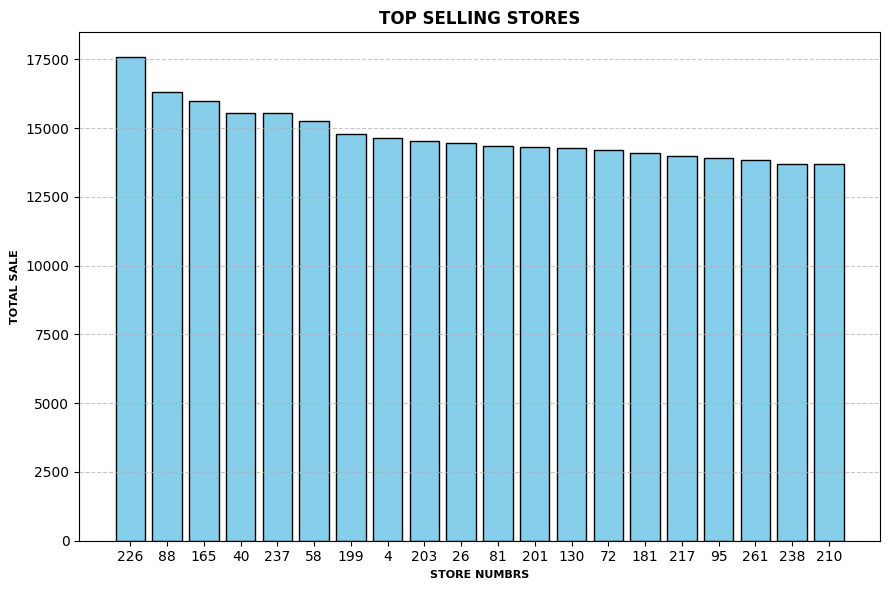

In [43]:
#PLOTTING TOP 20 STORES BASED ON SALES- 
plt.figure(figsize = (9, 6))

plt.bar(top_20_store.index.astype(str), top_20_store.values, color="skyblue", edgecolor="black")
plt.xticks(top_20_store.index.astype(str), rotation = 'horizontal')
plt.xlabel("STORE NUMBRS", fontsize = 8, fontweight = 'bold')
plt.ylabel("TOTAL SALE", fontsize = 8, fontweight = 'bold')
plt.title("TOP SELLING STORES", fontsize = 12, fontweight = 'bold')
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
                  

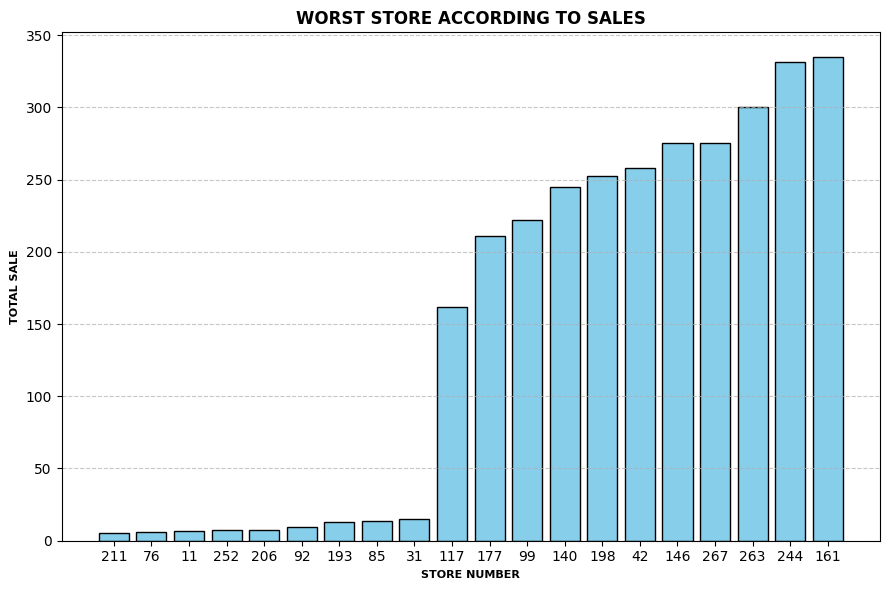

In [44]:
#PLOTTING worst 20 STORES BASED ON SALES- 
plt.figure(figsize = (9, 6))

plt.bar(least_sale_stores.index.astype(str), least_sale_stores.values, color="skyblue", edgecolor="black")
plt.xticks(least_sale_stores.index.astype(str), rotation = 'horizontal')
plt.xlabel("STORE NUMBER", fontsize = 8, fontweight = 'bold')
plt.ylabel("TOTAL SALE", fontsize = 8, fontweight = 'bold')
plt.title("WORST STORE ACCORDING TO SALES", fontsize = 12, fontweight = 'bold')
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

#### THESE WORST 20 STORES HAVE MINIMAL SALES AND BOTTOM 9 STORE HAVE ONLY 2-3 TRANSACTIONS WHICH COULD BE CLOSED TO CUT DOWN ON COST AND TOP 20 STORES MUST BE PUSHED FOR SALE OF NEW PRODUCTS

In [45]:
df_complete.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


#### Q. TOP 40 SELLING PACK SIZE AND ITS PLOT

In [46]:
store_pack_analysis = df_complete.groupby(['PACK_SIZE(g)','STORE_NBR'])['TOT_SALES'].sum().sort_values(ascending = False)[:40]

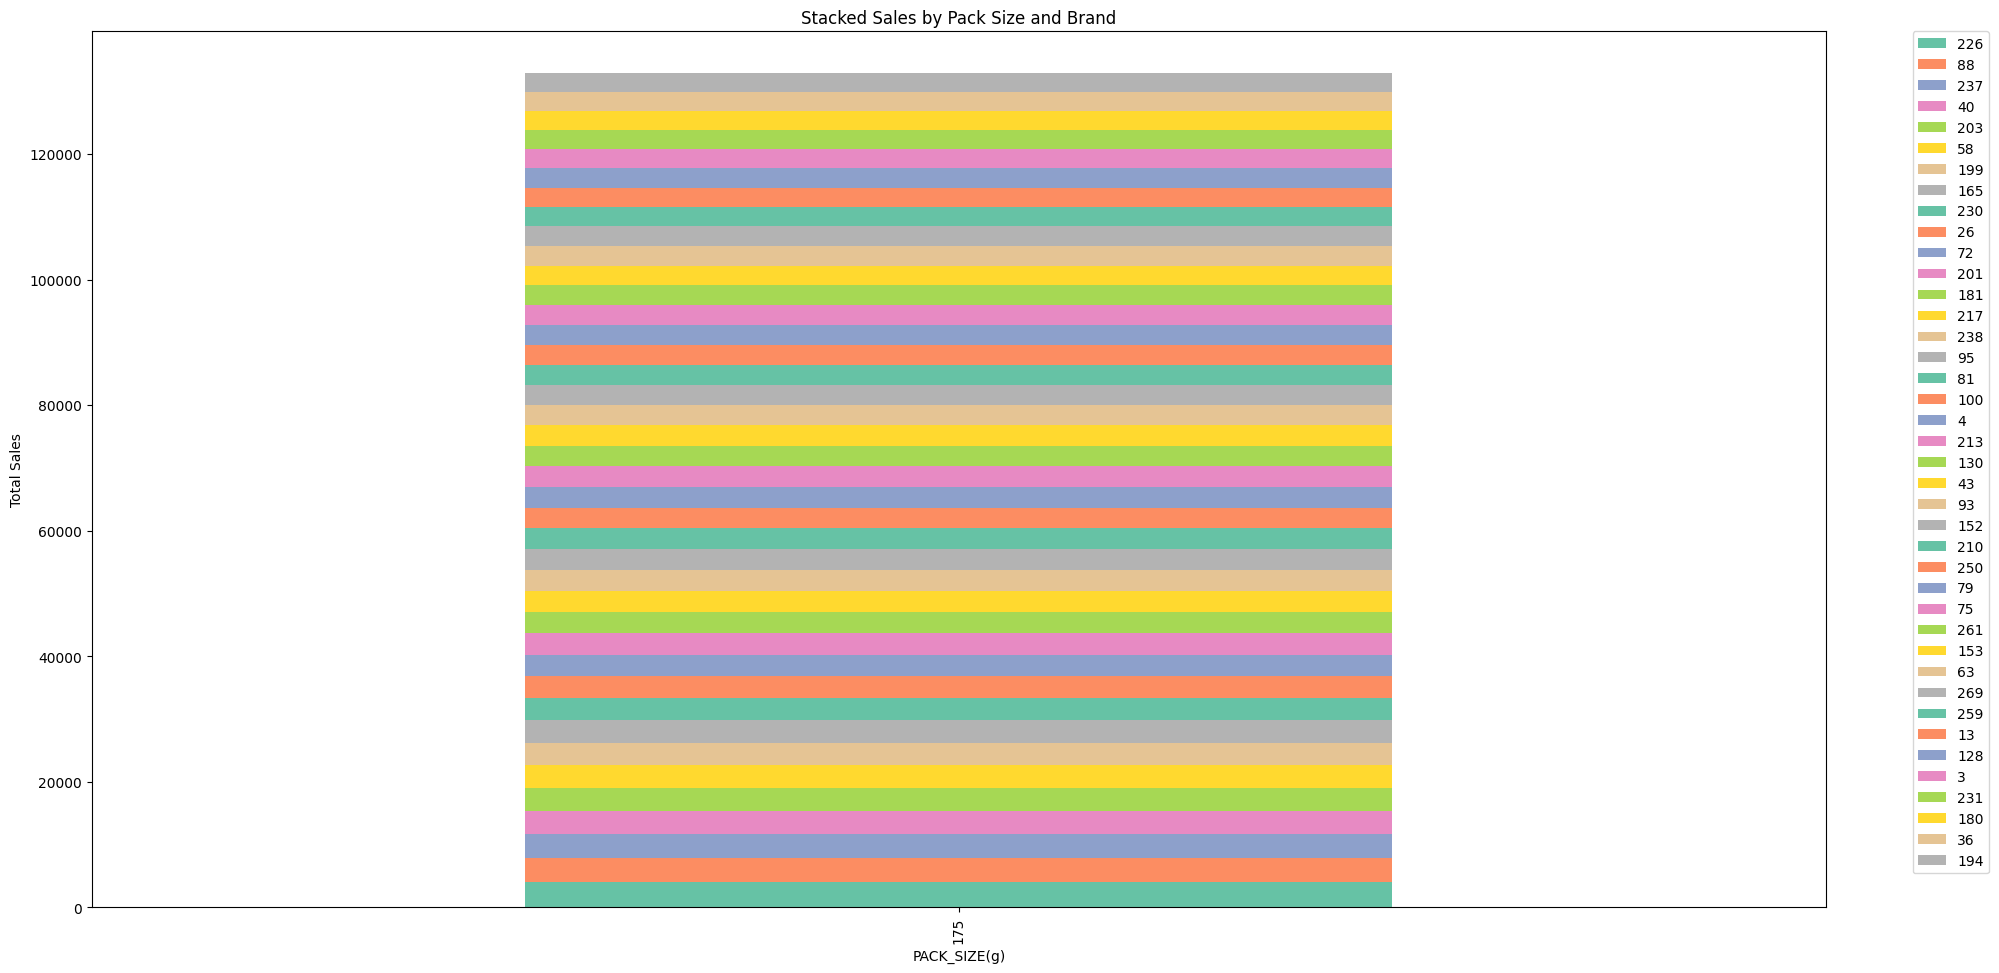

In [47]:
store_and_pack= store_pack_analysis.unstack()   # columns = BRAND_NAME, index = PACK_SIZE(g)

colors = sns.color_palette("Set2", n_colors=store_and_pack.shape[1])
store_and_pack.plot(kind="bar", stacked=True, figsize=(20,10), color = colors)
plt.title("Stacked Sales by Pack Size and Brand")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

#### HENCE THE TOP PRODUCT AMONG THE STORES IS 175g PACK.

#### Q. WHICH LIFESTAGE CUSTOMERS SPENS THE MOST AND IN WHAT TYPE OF PRODUCTS THEY SPEND MOST.

In [48]:
df_complete

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [49]:
df_complete.groupby('LIFESTAGE')['TOT_SALES'].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
OLDER FAMILIES            352467.20
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
Name: TOT_SALES, dtype: float64

In [50]:
lifestage_brand =df_complete.groupby(['LIFESTAGE', 'BRAND_NAME'])['TOT_SALES'].sum().reset_index()

In [51]:
lifestage_brand[lifestage_brand['LIFESTAGE']=='NEW FAMILIES'].sort_values(by = 'TOT_SALES', ascending = False)

,LIFESTAGE,BRAND_NAME,TOT_SALES
41,NEW FAMILIES,Kettle,10846.20
35,NEW FAMILIES,Doritos,5604.80
49,NEW FAMILIES,Smiths,4929.40
45,NEW FAMILIES,Pringles,4898.80
44,NEW FAMILIES,Old,2371.50
52,NEW FAMILIES,Thins,2326.50
53,NEW FAMILIES,Tostitos,2288.00
33,NEW FAMILIES,Cobs,2059.60
39,NEW FAMILIES,Infuzions,2038.60
54,NEW FAMILIES,Twisties,1998.90


In [52]:
df_complete['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [53]:
top_10_per_stage = (
    lifestage_brand
    .sort_values(by="TOT_SALES", ascending=False)
    .groupby("LIFESTAGE")
    .head(10)
)
top_10_per_stage

,LIFESTAGE,BRAND_NAME,TOT_SALES
99,OLDER SINGLES/COUPLES,Kettle,83862.6
128,RETIREES,Kettle,76914.8
70,OLDER FAMILIES,Kettle,65984.0
157,YOUNG FAMILIES,Kettle,60033.0
186,YOUNG SINGLES/COUPLES,Kettle,54241.0
...,...,...,...
52,NEW FAMILIES,Thins,2326.5
53,NEW FAMILIES,Tostitos,2288.0
33,NEW FAMILIES,Cobs,2059.6
39,NEW FAMILIES,Infuzions,2038.6


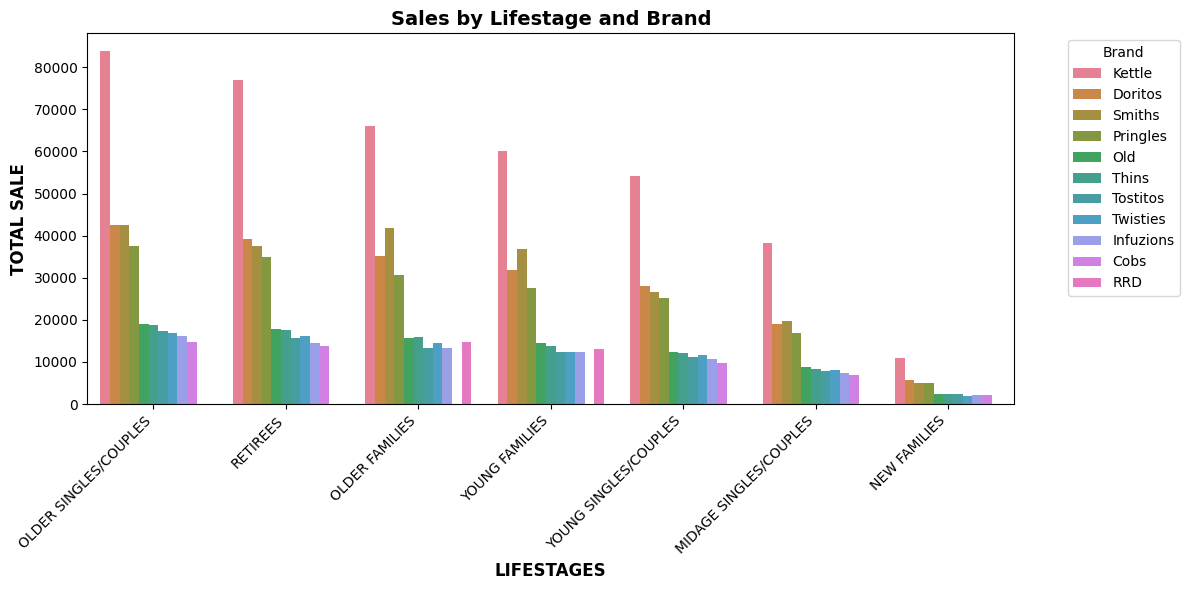

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_10_per_stage,
    x="LIFESTAGE",
    y="TOT_SALES",
    hue="BRAND_NAME",
    estimator=sum
)
plt.title("Sales by Lifestage and Brand", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("LIFESTAGES", fontsize=12, fontweight="bold")
plt.ylabel("TOTAL SALE", fontsize=12, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Brand")
plt.tight_layout()
plt.show()

In [55]:
df_complete

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


#### ANALYSIS BY THE CUSTOMER TYPE

In [56]:
customer_brand =df_complete.groupby(['PREMIUM_CUSTOMER', 'BRAND_NAME'])['TOT_SALES'].sum().reset_index()
customer_brand

,PREMIUM_CUSTOMER,BRAND_NAME,TOT_SALES
0,Budget,Burger,2527.7
1,Budget,CCs,6657.0
2,Budget,Cheetos,6071.6
3,Budget,Cheezels,13983.9
4,Budget,Cobs,23780.4
...,...,...,...
82,Premium,Tostitos,21128.8
83,Premium,Twisties,21123.1
84,Premium,Tyrrells,13377.0
85,Premium,WW,9914.6


In [57]:
top_10_per_customer = (
    customer_brand
    .sort_values(by="TOT_SALES", ascending=False)
    .groupby('PREMIUM_CUSTOMER')
    .head(10)
)
top_10_per_customer

,PREMIUM_CUSTOMER,BRAND_NAME,TOT_SALES
41,Mainstream,Kettle,154477.0
12,Budget,Kettle,134407.8
70,Premium,Kettle,101355.0
35,Mainstream,Doritos,80272.9
49,Mainstream,Smiths,79560.0
20,Budget,Smiths,75219.0
6,Budget,Doritos,70893.0
45,Mainstream,Pringles,69785.7
16,Budget,Pringles,61201.7
78,Premium,Smiths,55297.8


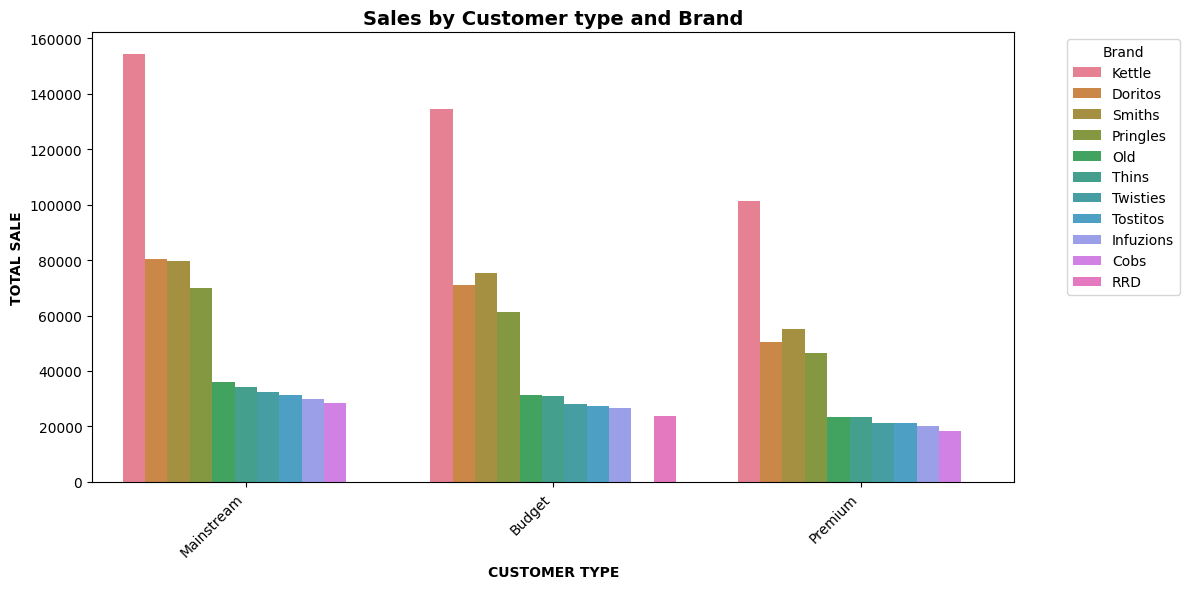

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_10_per_customer,
    x="PREMIUM_CUSTOMER",
    y="TOT_SALES",
    hue="BRAND_NAME",
    estimator=sum
)
plt.title("Sales by Customer type and Brand", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("CUSTOMER TYPE", fontsize=10, fontweight="bold")
plt.ylabel("TOTAL SALE", fontsize=10, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Brand")
plt.tight_layout()
plt.show()

In [59]:
customer_brand_avg =df_complete.groupby(['PREMIUM_CUSTOMER', 'BRAND_NAME'])['TOT_SALES'].mean().reset_index()
customer_brand_avg

,PREMIUM_CUSTOMER,BRAND_NAME,TOT_SALES
0,Budget,Burger,4.365630
1,Budget,CCs,3.964860
2,Budget,Cheetos,5.776974
3,Budget,Cheezels,8.600185
4,Budget,Cobs,7.263409
...,...,...,...
82,Premium,Tostitos,8.458287
83,Premium,Twisties,8.657008
84,Premium,Tyrrells,8.039062
85,Premium,WW,3.475149


In [60]:
top_10_per_customer_avg = (
    customer_brand_avg
    .sort_values(by="TOT_SALES", ascending=False)
    .groupby('PREMIUM_CUSTOMER')
    .head(10)
)
top_10_per_customer_avg

,PREMIUM_CUSTOMER,BRAND_NAME,TOT_SALES
5,Budget,Dorito,12.375237
34,Mainstream,Dorito,12.263368
63,Premium,Dorito,12.148455
15,Budget,Old,9.771683
73,Premium,Old,9.740234
44,Mainstream,Old,9.704376
12,Budget,Kettle,9.496100
70,Premium,Kettle,9.462702
41,Mainstream,Kettle,9.406138
32,Mainstream,Cheezels,8.820346


EVEN PREMIUM CUSTOMERS HAVE AVERAGE SALES COMPARABLE TO BUDGET OR MAINSTREAM CUSTOMERS AND IN TERMS OF TOTAL SALE THE PREMIUM CUSTOMER ARE EVEN LESS IN TERMS OF SALE.
PACK SIZE IS ALSO NOT BIG DIFFERENTITOR THE 175g PACK OVERPOWERS ALL OTHER CATEGORIES